##### Libraries:

In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from constants import *

##### Load and concatenate data:

In [7]:
files = os.listdir(DATA_PATH) # list of files in the folder 
files_turbine = [file for file in files if str(file).startswith('Turbine')]

In [8]:
def data_selection(data, turbine, year):
    col_indices = data.columns[[0, 15, 17, 18, 19, 61, 63, 64, 65, 62, 1, 2, 3, 4, 82, 85, 84, 83, 90, 107, 106, 105, 91, 110, 109, 108,
                       92, 153, 152, 151, 93, 138, 137, 136, 94, 123, 116, 115, 95, 150, 149, 148, 96, 135, 134,
                       133, 97, 122, 120, 119, 98, 121, 118, 117, 99, 126, 125, 124, 100, 156, 155, 154, 101, 129,
                       127, 128, 102, 132, 131, 130, 103, 141, 140, 139, 104, 147, 146, 145, 111, 159, 158, 157,
                       112, 162, 161, 160, 113, 165, 164, 163, 114, 144, 143, 142, 210, 245, 251, 250, 249, 246,
                       254, 253, 252, 247, 257, 256, 255, 261, 262, 287, 288, 289]]
    df = data[col_indices].copy()
    col_names = ["Date.time", "Wind.dir.me", "Wind.dir.std", "Wind.dir.min", "Wind.dir.max",
        "Power.me", "Power.sd", "Power.min", "Power.max", 
        "Pot.Power.me", 
        "Wind.speed.me", "Wind.speed.sd", "Wind.speed.min", "Wind.speed.max", 
        "Power.factor.cosphi.me", "Power.factor.cosphi.sd", "Power.factor.cosphi.min", "Power.factor.cosphi.max",
        "Front.bearing.temp.me", "Front.bearing.temp.sd", "Front.bearing.temp.min", "Front.bearing.temp.max",
        "Rear.bearing.temp.me", "Rear.bearing.temp.sd", "Rear.bearing.temp.min", "Rear.bearing.temp.max",
        "Stator1.temp.me", "Stator1.temp.sd", "Stator1.temp.min", "Stator1.temp.max",
        "Nacelle.ambient.temp.me", "Nacelle.ambient.temp.sd", "Nacelle.ambient.temp.min", "Nacelle.ambient.temp.max",
        "Nacelle.temp.me", "Nacelle.temp.sd", "Nacelle.temp.min", "Nacelle.temp.max",
        "Transformer.temp.me", "Transformer.temp.sd", "Transformer.temp.min", "Transformer.temp.max",
        "Gear.oil.inlet.temp.me", "Gear.oil.inlet.temp.sd", "Gear.oil.inlet.temp.min", "Gear.oil.inlet.temp.max",
        "Generator.bearing.rear.temp.me", "Generator.bearing.rear.temp.sd", "Generator.bearing.rear.temp.min", "Generator.bearing.rear.temp.max",
        "Generator.bearing.front.temp.me", "Generator.bearing.front.temp.sd", "Generator.bearing.front.temp.min", "Generator.bearing.front.temp.max",
        "Gear.oil.temp.me", "Gear.oil.temp.sd", "Gear.oil.temp.min", "Gear.oil.temp.max",
        "Top.box.temp.me", "Top.box.temp.sd", "Top.box.temp.min", "Top.box.temp.max",
        "Hub.temp.me", "Hub.temp.sd", "Hub.temp.min", "Hub.temp.max",
        "Conv.Amb.temp.me", "Conv.Amb.temp.sd", "Conv.Amb.temp.min", "Conv.Amb.temp.max",
        "Rotor.bearing.temp.me", "Rotor.bearing.temp.sd", "Rotor.bearing.temp.min", "Rotor.bearing.temp.max",
        "Transformer.cell.temp.me", "Transformer.cell.temp.sd", "Transformer.cell.temp.min", "Transformer.cell.temp.max",
        "Motor.axis1.temp.me", "Motor.axis1.temp.sd", "Motor.axis1.temp.min", "Motor.axis1.temp.max",
        "Motor.axis2.temp.me", "Motor.axis2.temp.sd", "Motor.axis2.temp.min", "Motor.axis2.temp.max", 
        "Motor.axis3.temp.me", "Motor.axis3.temp.sd", "Motor.axis3.temp.min", "Motor.axis3.temp.max",
        "CPU.temp.me", "CPU.temp.sd", "CPU.temp.min", "CPU.temp.max", 
        "Rotor.speed.me", 
        "Blade.ang.pitch.pos.A.me", "Blade.ang.pitch.pos.A.sd", "Blade.ang.pitch.pos.A.min", "Blade.ang.pitch.pos.A.max", 
        "Blade.ang.pitch.pos.B.me", "Blade.ang.pitch.pos.B.sd", "Blade.ang.pitch.pos.B.min", "Blade.ang.pitch.pos.B.max", 
        "Blade.ang.pitch.pos.C.me", "Blade.ang.pitch.pos.C.sd", "Blade.ang.pitch.pos.C.min", "Blade.ang.pitch.pos.C.max", 
        "Gear.oil.inlet.press.me", "Gear.oil.pump.press.me", "Drive.train.acceleration.me", 
        "Tower.Acceleration.x", "Tower.Acceleration.y"]
    df.columns = col_names
    df["turbine"] = turbine
    df["year"] = year
    return df

In [9]:
def concatenate_files(files):
    dfs = []
    for file in files_turbine:
        turbine = int(str(file).split('_')[3])
        year = int(str(file).split('_')[4][:4])
        df_old = pd.read_csv(DATA_PATH + '/' + file, skiprows=range(0, 9))
        df = data_selection(df_old, turbine, year)
        dfs.append(df)
    df_concatenated = pd.concat(dfs, ignore_index=True) 
    return df_concatenated

In [10]:
DATETIME_COL = 'Date.time'
df = concatenate_files(files_turbine)
df.head()

,Date.time,Wind.dir.me,Wind.dir.std,Wind.dir.min,Wind.dir.max,Power.me,Power.sd,Power.min,Power.max,Pot.Power.me,...,Blade.ang.pitch.pos.C.sd,Blade.ang.pitch.pos.C.min,Blade.ang.pitch.pos.C.max,Gear.oil.inlet.press.me,Gear.oil.pump.press.me,Drive.train.acceleration.me,Tower.Acceleration.x,Tower.Acceleration.y,turbine,year
0,2016-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016
1,2016-01-03 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016
2,2016-01-03 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016
3,2016-01-03 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016
4,2016-01-03 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016


In [11]:
print("Print total number of datapoints before filtering: ", len(df))

Print total number of datapoints before filtering:  1733184


##### Pre-process data:

Standard deviations and minimal and maximal values provide useful quantification of variability within the 10-minute intervals, for this reason, only data entries from the 25th of September 2017 were considered (i.e., when the SCADA monitoring system started recording standard deviations).

- One observation is that we have more NaN values in wind speed std than in power std.  
- I select to keep the dataframe that has fully completed the wind speed std and power std column.  

In [12]:
for col in ["Wind.dir.me", "Wind.dir.min", "Wind.dir.max"]:
    df[col.replace('dir', 'dir.sin')] = np.sin(np.radians(df[col]))
    df[col.replace('dir', 'dir.cos')] = np.cos(np.radians(df[col]))
df = df.drop(columns=["Wind.dir.me", "Wind.dir.min", "Wind.dir.max"])

In [13]:
# Check if there are any NaNs in the DataFrame
contains_nans = df.isnull().values.any()
print(f"Does the DataFrame contain NaNs? {contains_nans}")

# Count the number of rows with at least one NaN
rows_with_nans = df.isnull().any(axis=1).sum()
print(f"Number of rows with NaNs: {rows_with_nans}")

Does the DataFrame contain NaNs? True
Number of rows with NaNs: 1300502


In [14]:
df_final = df[~df['Wind.speed.sd'].isnull()] # select rows with entries for wind speed std
df_final.to_pickle(DATA_PATH + '/unfiltered/full_new.pkl')
df_final.head()

,Date.time,Wind.dir.std,Power.me,Power.sd,Power.min,Power.max,Pot.Power.me,Wind.speed.me,Wind.speed.sd,Wind.speed.min,...,Tower.Acceleration.x,Tower.Acceleration.y,turbine,year,Wind.dir.sin.me,Wind.dir.cos.me,Wind.dir.sin.min,Wind.dir.cos.min,Wind.dir.sin.max,Wind.dir.cos.max
90864,2017-09-25 00:00:00,5.049604,200.121521,23.819124,157.306244,240.665955,236.830036,5.171129,0.390980,4.240140,...,22.022369,14.627177,1,2017,0.480302,-0.877103,0.606593,-0.795012,0.320156,-0.947365
90865,2017-09-25 00:10:00,3.185307,196.931503,11.779391,174.080612,224.724045,221.866237,5.090679,0.436131,4.303428,...,20.714163,10.469490,1,2017,0.530766,-0.847518,0.611328,-0.791378,0.464390,-0.885631
90866,2017-09-25 00:20:00,5.830245,197.651825,11.052958,174.656937,214.682724,240.928125,5.193162,0.305424,4.739578,...,23.446747,11.127916,1,2017,0.439444,-0.898270,0.645190,-0.764022,0.293278,-0.956027
90867,2017-09-25 00:30:00,6.335346,182.931046,9.611711,167.144882,198.324615,204.527186,4.995740,0.258361,4.488607,...,18.103645,11.582632,1,2017,0.393093,-0.919499,0.657700,-0.753280,0.166498,-0.986042
90868,2017-09-25 00:40:00,3.186775,202.370926,7.406655,183.193558,211.172287,225.665257,5.111104,0.296016,4.674517,...,19.340059,12.164517,1,2017,0.336811,-0.941572,0.450813,-0.892618,0.233799,-0.972285


In [15]:
print('Deleted because of NaNs in wind speed std and power std columns: ', 
      round((df.shape[0] - df_final.shape[0]) / df.shape[0] * 100, 1) ,'% of the total data.')

Deleted because of NaNs in wind speed std and power std columns:  32.5 % of the total data.



##### Load Status file:

In [16]:
status_df = pd.read_excel(DATA_PATH + '/status_file/status.xlsx', sheet_name = 'Status file')
status_df.head()

,Wind Turbine,Timestamp start,Timestamp end,Duration,Status,Code,Message,Comment,Service contract category,IEC category
0,1,2016-01-14 19:28:03,2016-01-23 14:36:32,1900-01-08 19:08:29,Stop,111,Emergency stop nacelle,NaN,Emergency stop switch (Nacelle) (11),Forced outage
1,1,2016-01-14 19:28:03,2016-01-14 19:38:03,00:10:00,Warning,5720,Brake accumulator defect,NaN,Warnings (27),NaN
2,1,2016-01-14 19:28:05,2016-01-23 11:27:46,1900-01-08 15:59:41,Informational,3835,Cable panel breaker open,NaN,Warnings (27),NaN
3,1,2016-01-14 19:28:05,2016-01-23 11:27:46,1900-01-08 15:59:41,Informational,3830,Supply circuit breaker earthed,NaN,Warnings (27),Full Performance
4,1,2016-01-14 19:28:05,2016-01-23 14:09:18,1900-01-08 18:41:13,Warning,3870,Overload transformer fan outlet air,NaN,Warnings (27),Full Performance


#### Data Cleaning  - Faults
Removing time intervals that are included in the status faults file:

In [17]:
df_final

,Date.time,Wind.dir.std,Power.me,Power.sd,Power.min,Power.max,Pot.Power.me,Wind.speed.me,Wind.speed.sd,Wind.speed.min,...,Tower.Acceleration.x,Tower.Acceleration.y,turbine,year,Wind.dir.sin.me,Wind.dir.cos.me,Wind.dir.sin.min,Wind.dir.cos.min,Wind.dir.sin.max,Wind.dir.cos.max
90864,2017-09-25 00:00:00,5.049604,200.121521,23.819124,157.306244,240.665955,236.830036,5.171129,0.390980,4.240140,...,22.022369,14.627177,1,2017,0.480302,-0.877103,0.606593,-0.795012,0.320156,-0.947365
90865,2017-09-25 00:10:00,3.185307,196.931503,11.779391,174.080612,224.724045,221.866237,5.090679,0.436131,4.303428,...,20.714163,10.469490,1,2017,0.530766,-0.847518,0.611328,-0.791378,0.464390,-0.885631
90866,2017-09-25 00:20:00,5.830245,197.651825,11.052958,174.656937,214.682724,240.928125,5.193162,0.305424,4.739578,...,23.446747,11.127916,1,2017,0.439444,-0.898270,0.645190,-0.764022,0.293278,-0.956027
90867,2017-09-25 00:30:00,6.335346,182.931046,9.611711,167.144882,198.324615,204.527186,4.995740,0.258361,4.488607,...,18.103645,11.582632,1,2017,0.393093,-0.919499,0.657700,-0.753280,0.166498,-0.986042
90868,2017-09-25 00:40:00,3.186775,202.370926,7.406655,183.193558,211.172287,225.665257,5.111104,0.296016,4.674517,...,19.340059,12.164517,1,2017,0.336811,-0.941572,0.450813,-0.892618,0.233799,-0.972285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733179,2021-06-30 23:10:00,5.470000,9.880000,20.959999,-13.830000,140.369995,32.580006,3.170000,0.400000,1.760000,...,NaN,NaN,6,2021,0.549460,0.835520,0.344151,0.938914,0.788870,0.614561
1733180,2021-06-30 23:20:00,4.720000,52.250000,10.130000,36.139999,70.720001,67.360008,3.640000,0.340000,2.640000,...,NaN,NaN,6,2021,0.552519,0.833500,0.340708,0.940169,0.770736,0.637155
1733181,2021-06-30 23:30:00,5.360000,40.950001,6.770000,22.030001,52.290001,59.219998,3.530000,0.350000,2.380000,...,NaN,NaN,6,2021,0.600420,0.799685,0.383973,0.923344,0.801254,0.598325
1733182,2021-06-30 23:40:00,4.980000,17.230000,8.240000,-2.500000,31.820000,27.399993,3.100000,0.350000,1.850000,...,NaN,NaN,6,2021,0.490143,0.871642,0.280834,0.959756,0.707107,0.707107


In [18]:
df_final.reset_index(inplace=True, drop=True) # reset index 

In [19]:
df_final

,Date.time,Wind.dir.std,Power.me,Power.sd,Power.min,Power.max,Pot.Power.me,Wind.speed.me,Wind.speed.sd,Wind.speed.min,...,Tower.Acceleration.x,Tower.Acceleration.y,turbine,year,Wind.dir.sin.me,Wind.dir.cos.me,Wind.dir.sin.min,Wind.dir.cos.min,Wind.dir.sin.max,Wind.dir.cos.max
0,2017-09-25 00:00:00,5.049604,200.121521,23.819124,157.306244,240.665955,236.830036,5.171129,0.390980,4.240140,...,22.022369,14.627177,1,2017,0.480302,-0.877103,0.606593,-0.795012,0.320156,-0.947365
1,2017-09-25 00:10:00,3.185307,196.931503,11.779391,174.080612,224.724045,221.866237,5.090679,0.436131,4.303428,...,20.714163,10.469490,1,2017,0.530766,-0.847518,0.611328,-0.791378,0.464390,-0.885631
2,2017-09-25 00:20:00,5.830245,197.651825,11.052958,174.656937,214.682724,240.928125,5.193162,0.305424,4.739578,...,23.446747,11.127916,1,2017,0.439444,-0.898270,0.645190,-0.764022,0.293278,-0.956027
3,2017-09-25 00:30:00,6.335346,182.931046,9.611711,167.144882,198.324615,204.527186,4.995740,0.258361,4.488607,...,18.103645,11.582632,1,2017,0.393093,-0.919499,0.657700,-0.753280,0.166498,-0.986042
4,2017-09-25 00:40:00,3.186775,202.370926,7.406655,183.193558,211.172287,225.665257,5.111104,0.296016,4.674517,...,19.340059,12.164517,1,2017,0.336811,-0.941572,0.450813,-0.892618,0.233799,-0.972285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169059,2021-06-30 23:10:00,5.470000,9.880000,20.959999,-13.830000,140.369995,32.580006,3.170000,0.400000,1.760000,...,NaN,NaN,6,2021,0.549460,0.835520,0.344151,0.938914,0.788870,0.614561
1169060,2021-06-30 23:20:00,4.720000,52.250000,10.130000,36.139999,70.720001,67.360008,3.640000,0.340000,2.640000,...,NaN,NaN,6,2021,0.552519,0.833500,0.340708,0.940169,0.770736,0.637155
1169061,2021-06-30 23:30:00,5.360000,40.950001,6.770000,22.030001,52.290001,59.219998,3.530000,0.350000,2.380000,...,NaN,NaN,6,2021,0.600420,0.799685,0.383973,0.923344,0.801254,0.598325
1169062,2021-06-30 23:40:00,4.980000,17.230000,8.240000,-2.500000,31.820000,27.399993,3.100000,0.350000,1.850000,...,NaN,NaN,6,2021,0.490143,0.871642,0.280834,0.959756,0.707107,0.707107


In [47]:
ids = np.unique(status_df['Wind Turbine'])

index_fault = list()

df_final[DATETIME_COL] = df_final.loc[:, DATETIME_COL].astype('datetime64[ns]') # convert date and time in the same format in SCADA and status file

for id in ids:
    print('Preprocess of wind turbine:', id)
    
    start, end, is_forced_outage_list = list(), list(), list()

    status = status_df[status_df['Wind Turbine'] == id]

    for tstamp_start in status['Timestamp start']:
        start.append(tstamp_start)

    for tstamp_end in status['Timestamp end']:
        if isinstance(tstamp_end, str):
            end.append(tstamp_end)
        else:
            end.append(pd.Timestamp(tstamp_end))

    for status, category in zip(status['Status'], status['IEC category']):
        is_forced_outage_list.append(status == 'Stop' and category == 'Forced outage')

    for x, y, is_forced_outage in zip(start, end, is_forced_outage_list):
        if not (isinstance(x, str) or isinstance(y, str)):
            exclude = np.where((df_final[DATETIME_COL] >= (x - timedelta(minutes=10))) & (df_final[DATETIME_COL] <= (y +  timedelta(minutes=10))) & (df_final.turbine == id))
            if is_forced_outage:
                exclude = np.where((df_final[DATETIME_COL] >= (x - timedelta(days=3))) & (df_final[DATETIME_COL] <= (y +  timedelta(days=3))) & (df_final.turbine == id))
            index_fault.append(exclude[0])

out = np.concatenate(index_fault).tolist()
out = list(out)

C:\Users\filip\AppData\Local\Temp\ipykernel_26944\4172527606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[DATETIME_COL] = df_final.loc[:, DATETIME_COL].astype('datetime64[ns]') # convert date and time in the same format in SCADA and status file


Preprocess of wind turbine: 1
Preprocess of wind turbine: 2
Preprocess of wind turbine: 3
Preprocess of wind turbine: 4
Preprocess of wind turbine: 5
Preprocess of wind turbine: 6


In [49]:
out = np.concatenate(index_fault).tolist()

In [50]:
out = list(out)

In [51]:
out

[15,
 16,
 20,
 21,
 33,
 34,
 35,
 55,
 56,
 67,
 68,
 70,
 71,
 89,
 90,
 97,
 98,
 103,
 104,
 106,
 107,
 110,
 111,
 113,
 114,
 114,
 115,
 116,
 117,
 118,
 123,
 124,
 135,
 136,
 139,
 140,
 165,
 166,
 178,
 179,
 181,
 182,
 191,
 192,
 195,
 196,
 209,
 210,
 215,
 216,
 224,
 225,
 226,
 227,
 241,
 242,
 473,
 474,
 488,
 489,
 491,
 492,
 498,
 499,
 501,
 502,
 502,
 503,
 505,
 506,
 1073,
 1074,
 1075,
 1482,
 1483,
 1675,
 1676,
 1675,
 1676,
 1677,
 2010,
 2011,
 2112,
 2113,
 2493,
 2494,
 2630,
 2631,
 2632,
 2631,
 2632,
 3269,
 3270,
 3272,
 3273,
 3274,
 3275,
 3277,
 3278,
 3282,
 3283,
 3310,
 3311,
 3315,
 3316,
 3320,
 3321,
 3322,
 3426,
 3427,
 3486,
 3487,
 3488,
 3495,
 3496,
 3659,
 3660,
 3685,
 3686,
 3687,
 3688,
 3689,
 3690,
 3691,
 3692,
 3693,
 3694,
 3695,
 3696,
 3697,
 3698,
 3699,
 3700,
 3701,
 3702,
 3703,
 3704,
 3705,
 3706,
 3707,
 3708,
 3709,
 3710,
 3711,
 3712,
 3713,
 3714,
 3715,
 3716,
 3717,
 3718,
 3719,
 3720,
 3721,
 3722,
 3

In [52]:
df_final.shape

(1169064, 117)

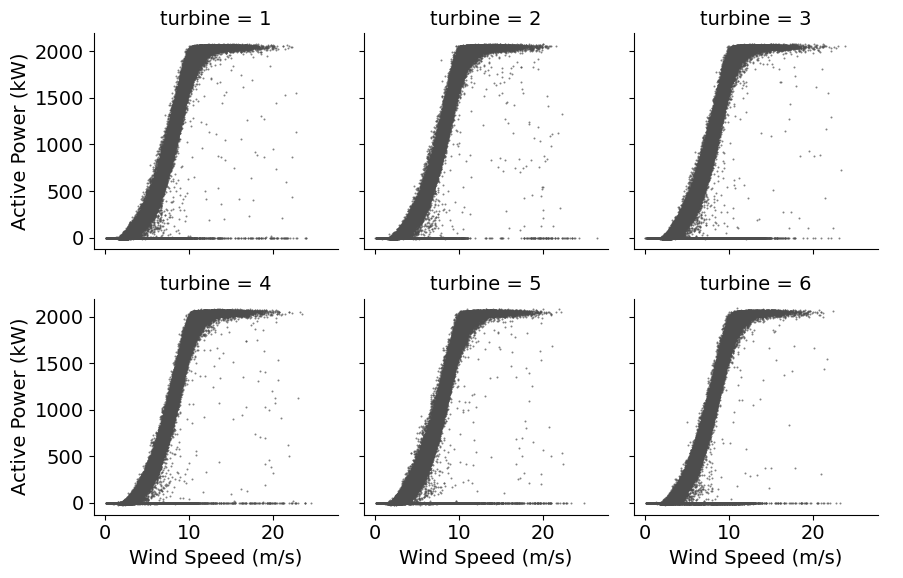

In [53]:
# Data points before removal

plt.rc('font', size=14)
grid = sns.FacetGrid(df_final, col ='turbine', col_wrap= 3)
grid.map(sns.scatterplot, 'Wind.speed.me', 'Power.me', alpha = .7, color="0.3", linewidth = 0, s = 2)
grid.add_legend()
grid.set_axis_labels("Wind Speed (m/s)", "Active Power (kW)")
plt.show()

In [54]:
df_cleaned = df_final.drop(out, axis=0)

In [55]:
df_cleaned.shape

(847078, 117)

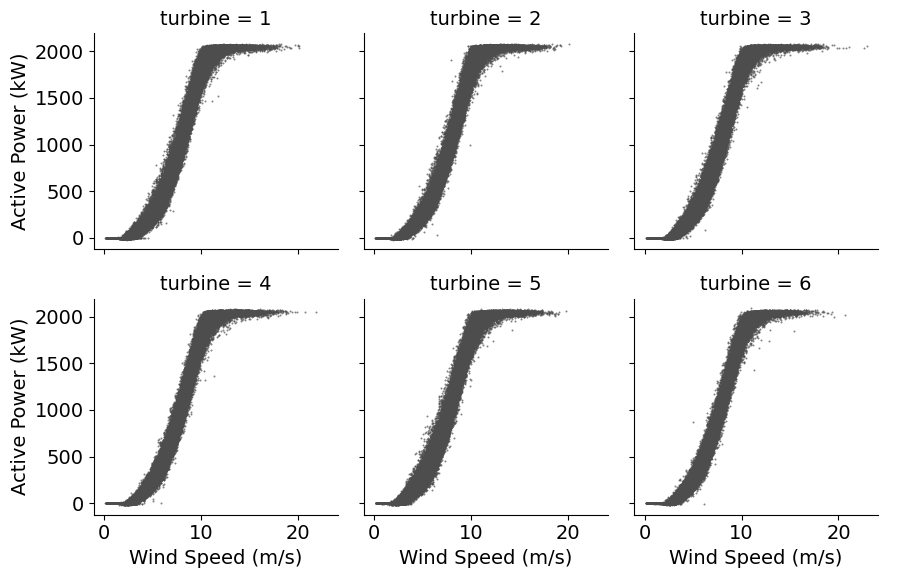

In [56]:
# Data set after cleaning 

plt.rc('font', size=14)
grid = sns.FacetGrid(df_cleaned, col ='turbine', col_wrap= 3)
grid.map(sns.scatterplot, 'Wind.speed.me', 'Power.me', alpha = .7, color="0.3", linewidth = 0, s = 2)
grid.add_legend()
grid.set_axis_labels("Wind Speed (m/s)", "Active Power (kW)")
plt.show()

In [57]:
n = df_cleaned.shape[0]
max_len = max(len(col) for col in df_cleaned.columns) + len("Column: ")
for col in df_cleaned.columns:
    nan_percentage = round((df_cleaned[col].isna().sum()/n)*100, 2)
    print(f"Column: {col.ljust(max_len)} has {nan_percentage}% of NaNs out of total")
 

Column: Date.time                                has 0.0% of NaNs out of total
Column: Wind.dir.std                             has 0.0% of NaNs out of total
Column: Power.me                                 has 0.0% of NaNs out of total
Column: Power.sd                                 has 0.0% of NaNs out of total
Column: Power.min                                has 0.0% of NaNs out of total
Column: Power.max                                has 0.0% of NaNs out of total
Column: Pot.Power.me                             has 0.0% of NaNs out of total
Column: Wind.speed.me                            has 0.0% of NaNs out of total
Column: Wind.speed.sd                            has 0.0% of NaNs out of total
Column: Wind.speed.min                           has 0.0% of NaNs out of total
Column: Wind.speed.max                           has 0.0% of NaNs out of total
Column: Power.factor.cosphi.me                   has 0.0% of NaNs out of total
Column: Power.factor.cosphi.sd                   has

In [58]:
nans = df_cleaned[~df_cleaned.isnull().any(axis=1)].shape[0]
print("Percentage of rows with at least one NaN value: ", round(nans/n*100, 2))

Percentage of rows with at least one NaN value:  34.28


In [59]:
df_cleaned.head()

,Date.time,Wind.dir.std,Power.me,Power.sd,Power.min,Power.max,Pot.Power.me,Wind.speed.me,Wind.speed.sd,Wind.speed.min,...,Tower.Acceleration.x,Tower.Acceleration.y,turbine,year,Wind.dir.sin.me,Wind.dir.cos.me,Wind.dir.sin.min,Wind.dir.cos.min,Wind.dir.sin.max,Wind.dir.cos.max
0,2017-09-25 00:00:00,5.049604,200.121521,23.819124,157.306244,240.665955,236.830036,5.171129,0.390980,4.240140,...,22.022369,14.627177,1,2017,0.480302,-0.877103,0.606593,-0.795012,0.320156,-0.947365
1,2017-09-25 00:10:00,3.185307,196.931503,11.779391,174.080612,224.724045,221.866237,5.090679,0.436131,4.303428,...,20.714163,10.469490,1,2017,0.530766,-0.847518,0.611328,-0.791378,0.464390,-0.885631
2,2017-09-25 00:20:00,5.830245,197.651825,11.052958,174.656937,214.682724,240.928125,5.193162,0.305424,4.739578,...,23.446747,11.127916,1,2017,0.439444,-0.898270,0.645190,-0.764022,0.293278,-0.956027
3,2017-09-25 00:30:00,6.335346,182.931046,9.611711,167.144882,198.324615,204.527186,4.995740,0.258361,4.488607,...,18.103645,11.582632,1,2017,0.393093,-0.919499,0.657700,-0.753280,0.166498,-0.986042
4,2017-09-25 00:40:00,3.186775,202.370926,7.406655,183.193558,211.172287,225.665257,5.111104,0.296016,4.674517,...,19.340059,12.164517,1,2017,0.336811,-0.941572,0.450813,-0.892618,0.233799,-0.972285


In [60]:
df_cleaned.to_pickle(DATA_PATH + '/cleaned/full.pkl')

In [61]:
print("Print total number of datapoints after filtering: ", len(df_cleaned))

Print total number of datapoints after filtering:  847078
